# Interpolation Theory
Interpolation is a method of constructing new data points within the range of a discrete set of known data points. There are various methods of interpolation such as: 
* 1) Nearest neighbor (locate the nearest data value, and assign the same value)

* 2) Linear interpolation (new data points are constructed using linear interpolants)
    * Between two known points: the linear interpolant is the straight line between two points
    * For a data set: is the concatenation of linear interpolants between each pair of data points
    
* 3) Polynomial interpolation (the interpolant now is a polynomial of higher degree, a more general case of linear interpolation)

* 4) Spline interpolation (uses low-degree polynomials in each of the intervals $(x_i,x_{i+1})$, and chooses the polynomial pieces such that they fit smoothly together)

In [7]:
# Importing Libraries
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

from pylab import *                                                             #
# from matplotlib.ticker import MultipleLocator                                   #
import matplotlib.gridspec as gridspec                                          #
# from scipy import stats                                                         #
# from astroML.plotting import hist                                               #

%matplotlib inline

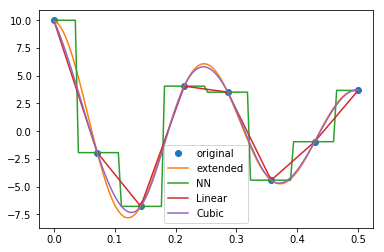

In [8]:
# Generate 1D data and plot them
A, nu, k = 10, 4, 2 # some supposedly random parameters that we "need" in a function

def f(x,A,nu,k):
    return A * np.exp(-k*x) * np.cos(2*np.pi * nu * x)

x = np.linspace(0,0.5,8)
y = f(x,A,nu,k)

# Define 3 interpolating functions from these data points
f_nn = interpolate.interp1d(x, y, kind='nearest') # nearerst neighbor
f_lin = interpolate.interp1d(x, y, kind='linear') # linear
f_cub = interpolate.interp1d(x, y, kind='cubic') # cubic - polynomial

# Now create new x array where we will need the interpolated y values 
x2 = np.linspace(0,0.5,100)

# Plots
plt.plot(x,y,'o',label='original')
plt.plot(x2,f(x2,A,nu,k),label='extended')
plt.plot(x2,f_nn(x2),label='NN')
plt.plot(x2,f_lin(x2),label='Linear')
plt.plot(x2,f_cub(x2),label='Cubic')
plt.legend()
plt.show()

We can see that the cubic one performs much better!

Now in 2D data...

In [9]:
# Generate 1D data and plot them
def func(x, y):                                                                 
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2                  
                                                                                
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:100j] # from 0-1 in 100 steps                                  

points = np.random.rand(1000, 2)                                                
values = func(points[:,0], points[:,1])                                         
image=func(grid_x, grid_y).T                                                    
imvals=image.flatten()                                                          
grid_x1D, grid_y1D =grid_x.flatten(), grid_y.flatten()                          
perm = permutation(len(imvals))                                                 
grid_x1Dp, grid_y1Dp=grid_x1D[perm], grid_y1D[perm]                             
                                                                                
gs = gridspec.GridSpec(1, 3, height_ratios=[1,1], wspace=0.5)                   
ax = plt.subplot(gs[0])                                                         
                                                                                
ax1=plt.subplot(gs[0])                                                          
ax2=plt.subplot(gs[1])                                                          
ax3=plt.subplot(gs[2])                                                          
ax1.imshow(image, extent=(0,1,0,1), origin='lower')                             
ax1.plot(points[:,0], points[:,1], 'k.', ms=1)                                  
                                                                                
ax2.plot(imvals)                                                                
ax3.plot(imvals[perm])                                                          
plt.show()                                                                      

ValueError: Expected the given number of height ratios to match the number of rows of the grid